<a href="https://colab.research.google.com/github/RupamManna68/ML/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
loan_dataset = pd.read_csv('/content/Loan_status.csv')

In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
loan_dataset.shape

(614, 13)

In [ ]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
loan_dataset['Gender'].value_counts()

,count
Gender,
Male,489
Female,112


In [ ]:
counts = loan_dataset[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']].apply(lambda x: x.value_counts()).T.stack()

In [ ]:
print(counts)

Gender         Female          112.0
               Male            489.0
Married        No              213.0
               Yes             398.0
Dependents     0               345.0
               1               102.0
               2               101.0
               3+               51.0
Education      Graduate        480.0
               Not Graduate    134.0
Self_Employed  No              500.0
               Yes              82.0
Property_Area  Rural           179.0
               Semiurban       233.0
               Urban           202.0
Loan_Status    N               192.0
               Y               422.0
dtype: float64


In [ ]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
new_dataset = loan_dataset.replace({'Gender':{'Male':1,'Female':0},
                      'Married':{'No':0,'Yes':1},
                      'Dependents':{'3+':4},
                      'Education':{'Graduate':1,'Not Graduate':0},
                      'Self_Employed':{'No':1,'Yes':0},
                      'Loan_Status':{'N':0,'Y':1}
                      })

In [84]:
print(new_dataset)

      Loan_ID  Gender  Married  ... Credit_History  Property_Area  Loan_Status
0    LP001002     1.0      0.0  ...            1.0          Urban            1
1    LP001003     1.0      1.0  ...            1.0          Rural            0
2    LP001005     1.0      1.0  ...            1.0          Urban            1
3    LP001006     1.0      1.0  ...            1.0          Urban            1
4    LP001008     1.0      0.0  ...            1.0          Urban            1
..        ...     ...      ...  ...            ...            ...          ...
609  LP002978     0.0      0.0  ...            1.0          Rural            1
610  LP002979     1.0      1.0  ...            1.0          Rural            1
611  LP002983     1.0      1.0  ...            1.0          Urban            1
612  LP002984     1.0      1.0  ...            1.0          Urban            1
613  LP002990     0.0      0.0  ...            0.0      Semiurban            0

[614 rows x 13 columns]


In [85]:
counts = new_dataset[['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']].astype(str).apply(lambda x: x.value_counts(dropna=False)).T.stack()

In [86]:
print(counts)

Gender         0.0          112.0
               1.0          489.0
               nan           13.0
Married        0.0          213.0
               1.0          398.0
               nan            3.0
Dependents     0            345.0
               1            102.0
               2            101.0
               4             51.0
               nan           15.0
Education      0            134.0
               1            480.0
Self_Employed  0.0           82.0
               1.0          500.0
               nan           32.0
Property_Area  Rural        179.0
               Semiurban    233.0
               Urban        202.0
Loan_Status    0            192.0
               1            422.0
dtype: float64


In [87]:
new_dataset.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,0.813644,0.651391,0.781759,0.859107,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [88]:
new_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [89]:
encoded = pd.get_dummies(new_dataset['Property_Area'],prefix='Area').astype(int)
new_dataset = pd.concat([new_dataset,encoded],axis=1)

In [90]:
print(new_dataset)

      Loan_ID  Gender  Married  ... Area_Rural  Area_Semiurban  Area_Urban
0    LP001002     1.0      0.0  ...          0               0           1
1    LP001003     1.0      1.0  ...          1               0           0
2    LP001005     1.0      1.0  ...          0               0           1
3    LP001006     1.0      1.0  ...          0               0           1
4    LP001008     1.0      0.0  ...          0               0           1
..        ...     ...      ...  ...        ...             ...         ...
609  LP002978     0.0      0.0  ...          1               0           0
610  LP002979     1.0      1.0  ...          1               0           0
611  LP002983     1.0      1.0  ...          0               0           1
612  LP002984     1.0      1.0  ...          0               0           1
613  LP002990     0.0      0.0  ...          0               1           0

[614 rows x 16 columns]


In [91]:
new_dataset.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000,614.000000,614.000000
mean,0.813644,0.651391,0.781759,0.859107,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296,0.291531,0.379479,0.328990
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973,0.454838,0.485653,0.470229
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
new_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [93]:
new_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
0,LP001002,1.0,0.0,0,1,1.0,5849,0.0,NaN,360.0,1.0,Urban,1,0,0,1
1,LP001003,1.0,1.0,1,1,1.0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0
2,LP001005,1.0,1.0,0,1,0.0,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,1
3,LP001006,1.0,1.0,0,0,1.0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,1
4,LP001008,1.0,0.0,0,1,1.0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,1


In [94]:
new_dataset = new_dataset.dropna(subset=['LoanAmount','Loan_Amount_Term'])

In [95]:
new_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,2
Dependents,12
Education,0
Self_Employed,30
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [96]:
new_dataset = new_dataset.fillna({'Gender':0,'Married':0,'Dependents':'0','Self_Employed':1,'Credit_History':1})

In [97]:
new_dataset.shape

(578, 16)

In [98]:
new_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
1,LP001003,1.0,1.0,1,1,1.0,4583,1508.0,128.0,360.0,1.0,Rural,0,1,0,0
2,LP001005,1.0,1.0,0,1,0.0,3000,0.0,66.0,360.0,1.0,Urban,1,0,0,1
3,LP001006,1.0,1.0,0,0,1.0,2583,2358.0,120.0,360.0,1.0,Urban,1,0,0,1
4,LP001008,1.0,0.0,0,1,1.0,6000,0.0,141.0,360.0,1.0,Urban,1,0,0,1
5,LP001011,1.0,1.0,2,1,0.0,5417,4196.0,267.0,360.0,1.0,Urban,1,0,0,1


In [99]:
new_dataset = new_dataset.drop(columns={'Loan_ID','Property_Area'},axis=1)

In [100]:
new_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
1,1.0,1.0,1,1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1.0,1.0,0,1,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1.0,1.0,0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1.0,0.0,0,1,1.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1.0,1.0,2,1,0.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1


In [101]:
import matplotlib.pyplot as plt

<Axes: >

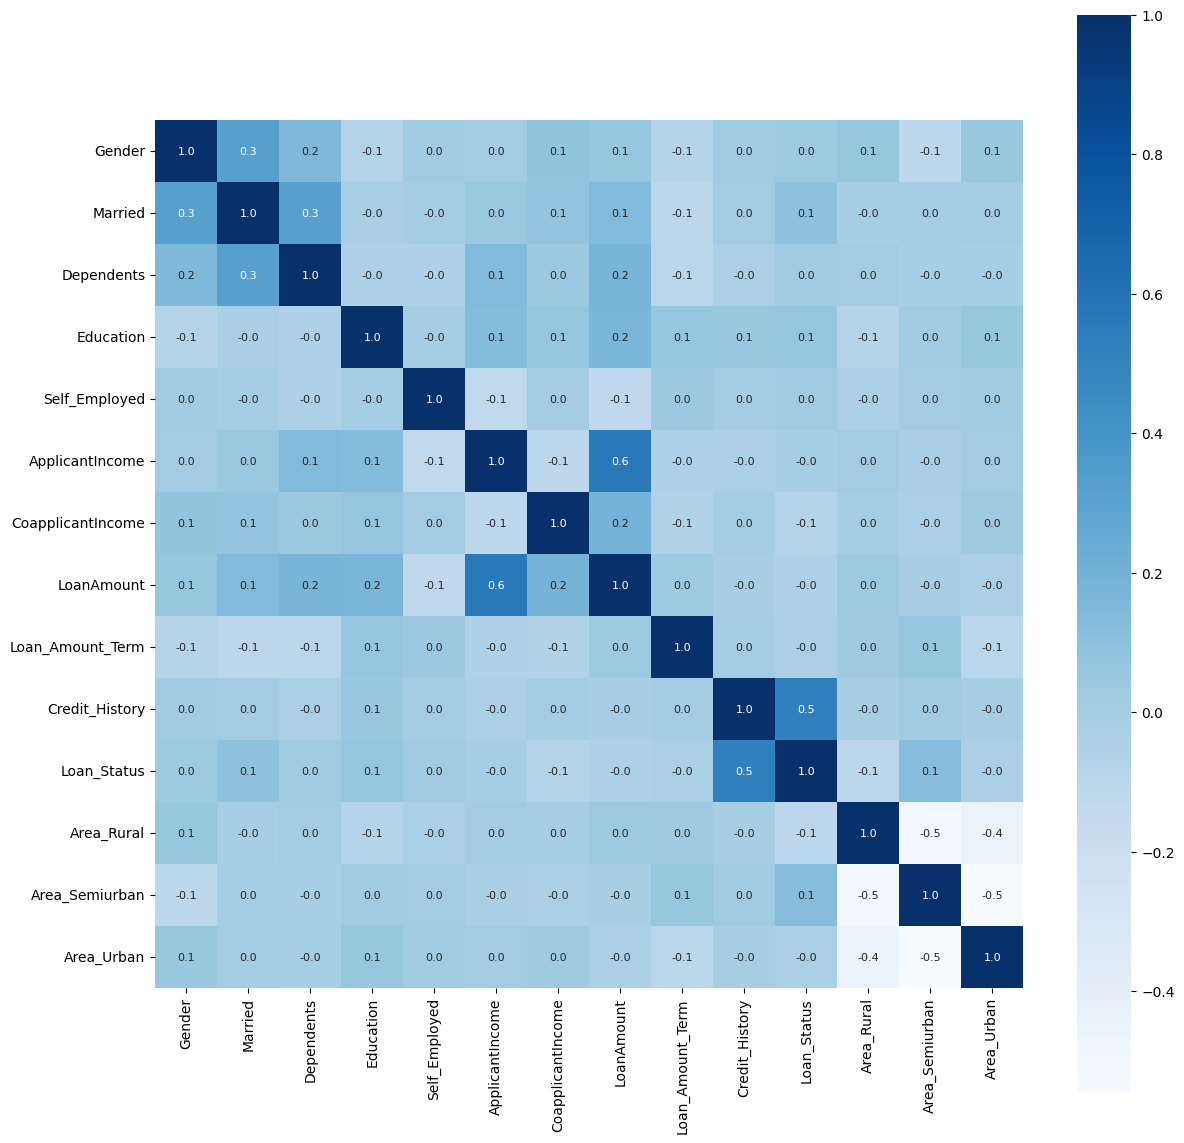

In [102]:
correlation = new_dataset.corr()
plt.figure(figsize=(14,14))
sns.heatmap(correlation,cbar=True,square=True,cmap='Blues',annot=True,annot_kws={'size':8},fmt='.1f')

In [103]:
new_dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Area_Rural,Area_Semiurban,Area_Urban
1,1.0,1.0,1,1,1.0,4583,1508.0,128.0,360.0,1.0,0,1,0,0
2,1.0,1.0,0,1,0.0,3000,0.0,66.0,360.0,1.0,1,0,0,1
3,1.0,1.0,0,0,1.0,2583,2358.0,120.0,360.0,1.0,1,0,0,1
4,1.0,0.0,0,1,1.0,6000,0.0,141.0,360.0,1.0,1,0,0,1
5,1.0,1.0,2,1,0.0,5417,4196.0,267.0,360.0,1.0,1,0,0,1


In [104]:
X = new_dataset.drop(columns='Loan_Status',axis=1)
Y = new_dataset['Loan_Status']

In [105]:
X.shape
Y.shape

(578,)

In [106]:
X.shape

(578, 13)

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [108]:
model = svm.SVC(kernel='linear')

In [109]:
model.fit(X_train,Y_train)

SVC(kernel='linear')

In [80]:
training_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_prediction,Y_train)

In [81]:
print(training_data_accuracy)

0.7943722943722944


In [82]:
test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(test_prediction,Y_test)
print(test_data_accuracy)

0.7672413793103449
